<a href="https://colab.research.google.com/github/sydstewart/Orders/blob/main/Orders_in.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

14
51
11
5
66
37
32
23
88
96
17
28
66
81
64
81
100
5
69
69
8
37
79
93
87
15
99
92
99
76
68
10
38
67
59
61
67
21
9
84
1
93
80
36
4
80
50
81
92
47
87
88
100
5
32
80
85
36
20
89
90
91
30
18
82
32
77
74
26
34
88
28
41
19
90
82
3
89
86
85
20
84
84
25
6
7
56
63
36
43
30
79
1
18
93
61
58
34
77
15
53
29
75
61
28
22
9
9
88
77
43
16
43
82
24
80
81
34
42
83
2
90
5
5
58
63
58
93
77
65
52
73
55
65
35
86
34
39
77
40
30
81
98
14
23
88
95
96
9
65
10
99
4
62
17
1
93
4
51
49
77
64
43
70
62
99
55
75
42
95
88
22
17
25
81
53
67
43
38
72
78
26
75
47
75
9
89
28
2
79
32
96
79
16
92
94
60
37
1
64
44
41
48
65
60
45
63
76
34
47
13
34
98
18
68
6
87
73
70
38
53
82
37
55
30
14
87
92
58
80
50
27
9
69
2
55
6
10
57
47
82
24
55
6
30
22
76
68
92
94
74
34
32
98
21
65
39
64
85
79
7
38
73
45
61
85
5
9
70
51
20
73
73
57
9
71
100
1
59
23
91
31
44
86
23
29
62
70
27
86
16
79
44
63
24
56
19
15
26
31
3
98
40
10
42
78
5
68
53
24
46
59
43
33
6
81
8
67
21
41
86
9
14
86
27
29
18
21
57
13
76
95
59
45
80
15
53
77
20
15
77
61
26
55
31


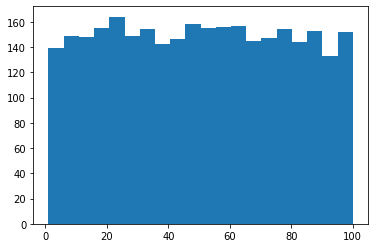

[0.04527776 4.84072352]
order  value for 40 = 9.852796061187256


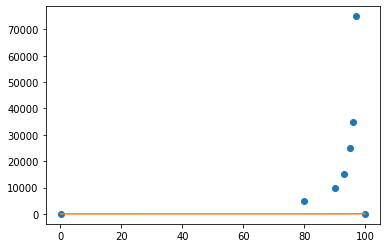

In [187]:

!pip install simpy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import random

histdata =[]
for x in range(3000):
  randnum =  random.randint(1,100) 
  print (randnum)
  histdata.append(randnum) 

print(histdata)
num_bins = 20 # <- number of bins for the histogram
plt.hist(histdata, num_bins)
plt.show()

y_data = np.array([100, 5000, 10000, 15000, 25000, 35000,75000,85])
x_data = np.array([0.1, 80, 90, 93, 95, 96, 97,100])

log_x_data = np.log(x_data),
log_y_data = np.log(y_data)

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)
#[  0.14703851 -10.50966207]
y = np.exp(-10.50966207) * np.exp(0.14703851*x_data)
plt.plot(x_data, y_data, "o")
plt.plot(x_data, y)

y = np.exp(-10.50) * np.exp(0.1470*40)
print('order  value for 40 =', y *1000)

def car(env):
     park_dur = []
     while True:
       #  print('Start parking at %d' % env.now)
         parking_duration = (np.random.exponential(10, 1)) 
        #  parking_duration = int(parking_duration)
         print('parking duration=', parking_duration *1000)
        #  park_dur.append = env.timeout(parking_duration)
         yield env.timeout(parking_duration)
        #  plt.hist(parking_duration)
        #  plt.show() 
      #   print('Start driving at %d' % env.now)
         trip_duration = 2
         yield env.timeout(trip_duration)
          

In [ ]:
# !pip install simpy
import simpy
park_dur = []
env = simpy.Environment()
env.process(car(env))
 
env.run(until=595)
# park_dur = car(env)

# print(park_dur)

parking duration= [16705.75203098]
parking duration= [34488.21358346]
parking duration= [2403.32890667]
parking duration= [40802.33310075]
parking duration= [10605.62873486]
parking duration= [3329.43919163]
parking duration= [5548.83179826]
parking duration= [20930.94548034]
parking duration= [15556.79476125]
parking duration= [343.72879246]
parking duration= [2378.6165246]
parking duration= [399.78210686]
parking duration= [489.55708104]
parking duration= [2758.60516182]
parking duration= [9045.45328435]
parking duration= [11401.4295965]
parking duration= [5309.89714572]
parking duration= [3720.97430094]
parking duration= [11638.38569328]
parking duration= [11704.22013451]
parking duration= [11054.22855101]
parking duration= [2066.55116006]
parking duration= [4293.79401873]
parking duration= [44052.62400121]
parking duration= [6168.25931417]
parking duration= [2580.35878755]
parking duration= [13430.56937109]
parking duration= [5745.43996377]
parking duration= [13626.55431671]
parkin